In [7]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from sklearn import datasets
from sklearn import mixture
from sklearn.mixture import GaussianMixture

In [931]:
iris = datasets.load_iris()
X_train = iris.data
y_train = iris.target

In [932]:
############ PCA on IRIS ##############
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [933]:
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf.fit(X_pca)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

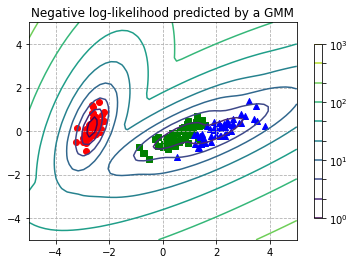

In [934]:
x = np.linspace(-5., 5.)
y = np.linspace(-5., 5.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
for label, color, marker in zip(range(3), ['r', 'g', 'b'], ['o', 's', '^']):
    plt.scatter(X_pca[y_train == label][:,0], X_pca[y_train == label][:,1], color = color, marker = marker)

plt.title('Negative log-likelihood predicted by a GMM', fontsize=12)
plt.axis('tight')
plt.grid(linestyle = '--')
plt.savefig('p4_EM_pdf.jpg', dpi=300, format='jpg')
plt.show()

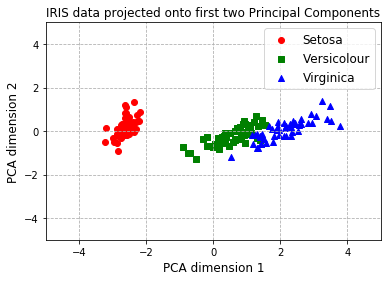

In [922]:
axes = plt.gca()
axes.set_xlim(-5, 5)
axes.set_ylim(-5, 5)
plt.grid(linestyle = '--')
for label, color, marker in zip(range(3), ['r', 'g', 'b'], ['o', 's', '^']):
    plt.scatter(X_pca[y_train == label][:,0], X_pca[y_train == label][:,1], color = color, marker = marker)
plt.legend(['Setosa', 'Versicolour', 'Virginica'], fontsize=12)
plt.title('IRIS data projected onto first two Principal Components',fontsize=12)
plt.xlabel('PCA dimension 1', fontsize=12)
plt.ylabel('PCA dimension 2', fontsize=12)
plt.savefig('p4_PCA_scatterplot.jpg', dpi=300, format='jpg')
plt.show()

In [982]:
iris = datasets.load_iris()

In [199]:
# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))

In [983]:
############ PCA on IRIS ##############
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)
y = iris.target

In [984]:
X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

In [985]:
print "Train: Class0: %d, Class1: %d, Class2: %d" % (np.sum(y_train == 0), np.sum(y_train == 1), np.sum(y_train == 2))
print "Test: Class0: %d, Class2: %d, Class3: %d" % (np.sum(y_test == 0), np.sum(y_test == 1), np.sum(y_test == 2))

Train: Class0: 37, Class1: 37, Class2: 37
Test: Class0: 13, Class2: 13, Class3: 13


max train acc = 92.79, max test acc = 97.44


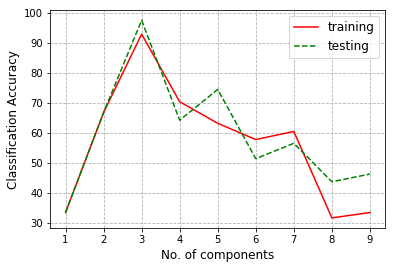

In [986]:
train_accs = []
test_accs = []
max_comp = 10
random_state = 11
for k in range(1, max_comp):
    clf = mixture.GaussianMixture(n_components = k, covariance_type = 'full', random_state = random_state)
    clf.fit(X_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc = 100. * np.mean(y_train_pred == y_train)
    test_acc = 100. * np.mean(y_test_pred == y_test)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)

print "max train acc = %.2f, max test acc = %.2f" % (max(train_accs), max(test_accs))
plt.plot(range(1, max_comp), train_accs, 'r-', range(1, max_comp), test_accs, 'g--')
plt.legend(['training', 'testing'], fontsize=12)
plt.grid(linestyle = '--')
plt.xlabel('No. of components', fontsize=12)
plt.ylabel('Classification Accuracy', fontsize=12)
#plt.savefig('p4_accuracyVsComponents.jpg', dpi=300, format='jpg')
plt.show()

In [987]:
from sklearn.mixture import GaussianMixture

clf = GaussianMixture(n_components = 3, covariance_type = 'full', random_state = random_state)
clf.fit(X_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print "Training accuracy = %.2f%%" % (100. * np.mean(y_train_pred == y_train))
print "Test accuracy = %.2f%%" % (100. * np.mean(y_test_pred == y_test))

Training accuracy = 92.79%
Test accuracy = 97.44%


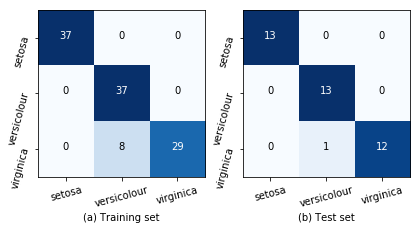

In [1004]:
from sklearn.metrics import confusion_matrix
import itertools

classes = ['setosa', 'versicolour', 'virginica']
tick_marks = np.arange(len(classes))

cm = confusion_matrix(y_train, y_train_pred)
plt.subplot(1,2,1)
plt.tight_layout()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('(a) Training set')
plt.xticks(tick_marks, classes, rotation=15)
plt.yticks(tick_marks, classes, rotation=75)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

cm = confusion_matrix(y_test, y_test_pred)
plt.subplot(1,2,2)
plt.tight_layout()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('(b) Test set')
plt.xticks(tick_marks, classes, rotation=15)
plt.yticks(tick_marks, classes, rotation=75)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.savefig('p4_confusion_matrix_MDA.jpg', dpi=300, format='jpg')
plt.show()

In [944]:
dot_size = 50
cmap = 'viridis'
def make_ellipses(gmm, ax):
    for n, color in enumerate('rgb'): # ymc
        v, w = np.linalg.eigh(gmm.covariances_[n][:2, :2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v *= 9
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

def plot_gmm(gmm, X, y, ax):
    labels = gmm.predict(X)
    for n, color, marker in zip(range(3), ['r', 'g', 'b'], ['o', 's', '^']):  # rgb
        data = X[y == n]
        ax.scatter(data[:, 0], data[:, 1], color = color, marker = marker)
    ax.set_xlim(-3.5, 5)
    ax.set_ylim(-2, 2)
    ax.grid(linestyle='--')
    plt.xlabel('PCA dimension 1', fontsize=15)
    plt.ylabel('PCA dimension 2', fontsize=15)
    ax.legend(['Setosa', 'Versicolour', 'Virginica'], fontsize = 15)
    make_ellipses(gmm, ax)

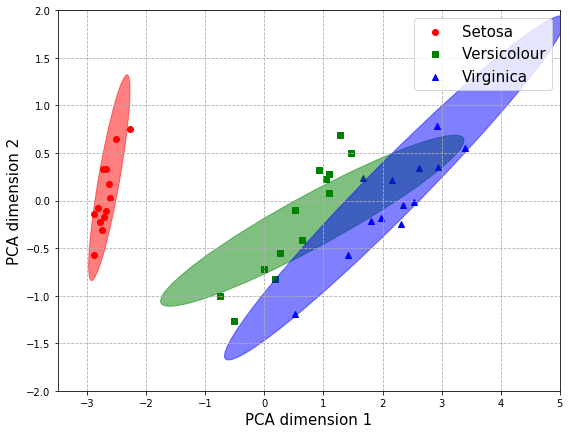

In [945]:
fig, ax = plt.subplots(figsize=(9,7))
plot_gmm(clf, X_test, y_test, ax)
plt.savefig('p4_test_ellipses_scatter.jpg', dpi=300, format='jpg')
plt.show()

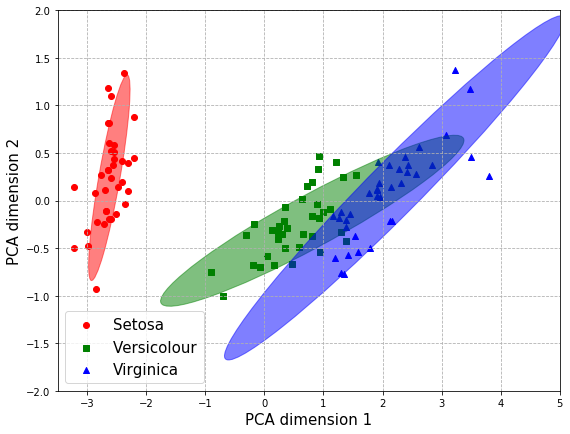

In [946]:
fig, ax = plt.subplots(figsize=(9,7))
plot_gmm(clf, X_train, y_train, ax)
plt.savefig('p4_train_ellipses_scatter.jpg', dpi=300, format='jpg')
plt.show()

In [956]:
from matplotlib import colors

def plot_data(lda, X, y, y_pred):
    
    cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7), (1, 1, 1)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1), (1, 0.7, 0.7)]})

    plt.cm.register_cmap(cmap=cmap)
    
    fig, ax = plt.subplots(figsize=(9,7))
    tp = (y == y_pred)  # True Positive
    tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[y == 2]
    X0, X1, X2 = X[y == 0], X[y == 1], X[y == 2]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    X2_tp, X2_fp = X2[tp2], X2[~tp2]
    
    alpha = 0.5

    # TP
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red', markeredgecolor='k')
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 's', alpha=alpha,
             color='blue', markeredgecolor='k')
    plt.plot(X2_tp[:, 0], X2_tp[:, 1], '^', alpha=alpha,
             color='green', markeredgecolor='k')
    # Legend
    plt.legend(['Setosa', 'Versicolour', 'Virginica'], fontsize = 15)
    # FP
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000', markeredgecolor='k')  # dark red
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099', markeredgecolor='k')  # dark blue
    plt.plot(X2_fp[:, 0], X2_fp[:, 1], '*', alpha=alpha,
             color='#009900', markeredgecolor='k')  # dark blue
    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z_m = lda.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_m = Z_m.reshape(xx.shape)
    plt.imshow(Z_m, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap='red_blue_classes',
               aspect='auto', origin='lower')
    Z_c = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z_c = Z_c[:, 1].reshape(xx.shape)
    plt.contour(xx, yy, Z_c, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    plt.plot(lda.means_[2][0], lda.means_[2][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    return ax

In [957]:
from scipy import linalg
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())

In [958]:
def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariances_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariances_[1], 'blue')
    plot_ellipse(splot, qda.means_[2], qda.covariances_[2], 'green')

In [1005]:
#################### QDA ####################
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariances=True)
qda.fit(X_train, y_train)

y_train_pred = qda.predict(X_train)
y_test_pred = qda.predict(X_test)

print "Training accuracy = %.2f%%" % (100.* np.mean(y_train_pred == y_train))
print "Test accuracy = %.2f%%" % (100.*np.mean(y_test_pred == y_test))

Training accuracy = 94.59%
Test accuracy = 100.00%


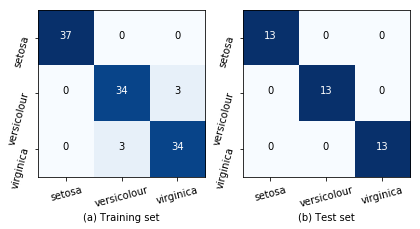

In [1007]:
from sklearn.metrics import confusion_matrix
import itertools

classes = ['setosa', 'versicolour', 'virginica']
tick_marks = np.arange(len(classes))

cm = confusion_matrix(y_train, y_train_pred)
plt.subplot(1,2,1)
plt.tight_layout()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('(a) Training set')
plt.xticks(tick_marks, classes, rotation=15)
plt.yticks(tick_marks, classes, rotation=75)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

cm = confusion_matrix(y_test, y_test_pred)
plt.subplot(1,2,2)
plt.tight_layout()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('(b) Test set')
plt.xticks(tick_marks, classes, rotation=15)
plt.yticks(tick_marks, classes, rotation=75)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.savefig('p4_confusion_matrix_QDA.jpg', dpi=300, format='jpg')
plt.show()

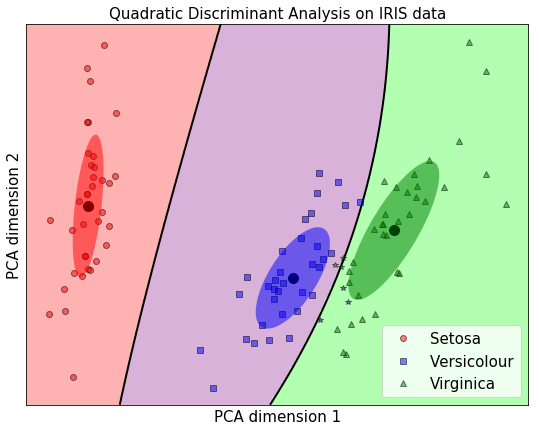

In [960]:
ax = plot_data(qda, X_train, y_train, y_train_pred)
plot_qda_cov(qda, ax)
plt.xlabel('PCA dimension 1', fontsize=15)
plt.ylabel('PCA dimension 2', fontsize=15)
plt.title('Quadratic Discriminant Analysis on IRIS data', fontsize=15)
plt.savefig('p4_train_QDA_scatter_plot.jpg', dpi=300, format='jpg')
plt.show()

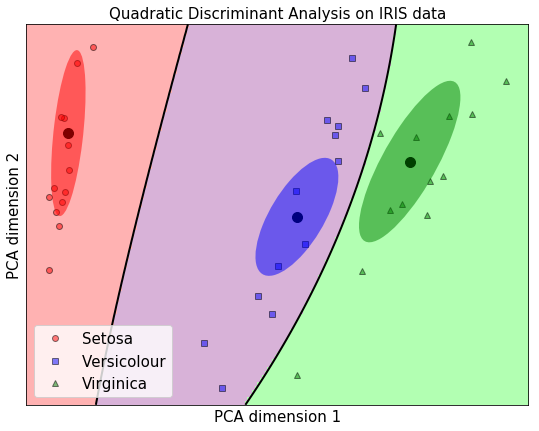

In [961]:
ax = plot_data(qda, X_test, y_test, y_test_pred)
plot_qda_cov(qda, ax)
plt.xlabel('PCA dimension 1', fontsize=15)
plt.ylabel('PCA dimension 2', fontsize=15)
plt.title('Quadratic Discriminant Analysis on IRIS data', fontsize=15)
plt.savefig('p4_test_QDA_scatter_plot.jpg', dpi=300, format='jpg')
plt.show()